In [2]:
from sklearn.cluster import MeanShift
import numpy as np
from matplotlib import pyplot as plt
import cv2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

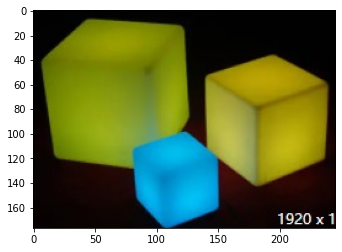

In [280]:
img_file = "6.jpg"
img_raw = cv2.imread(img_file)[:,:,::-1]# BGR 2 RGB
show_img = img_raw 
plt.imshow(show_img)
plt.show()

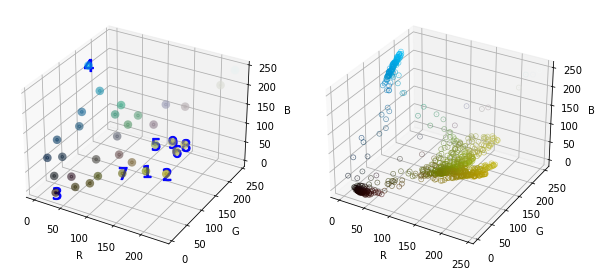

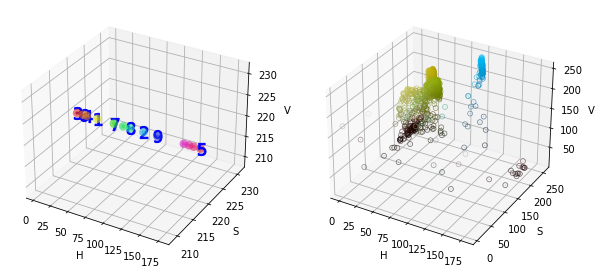

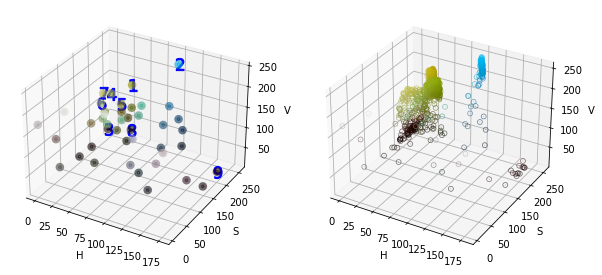

In [281]:
def color_mean_shift(rgb,
                     use_hsv = True,
                     only_h = True,
                     bandwidth = 10,
                     show_center = True,
                     show_disptrubition = True):

    img = cv2.resize(rgb, (50,25))
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).reshape(-1,1)
    if use_hsv:
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        hsv_flatten = hsv.reshape(-1,3)
    img_flatten = img.reshape(-1,3)
    not_black_index = np.where(img_gray > 10)[0]
    img_not_black = img_flatten[not_black_index]
    if use_hsv:
        hsv_not_black = hsv_flatten[not_black_index]
    img_flatten.shape, img_not_black.shape
    if use_hsv:
        x = hsv_not_black
        if only_h:
            x = hsv_not_black[:,0:1]
    else:
        x = img_not_black
    ms = MeanShift(bandwidth=bandwidth).fit(x)
    labels=ms.labels_
    cluster_centers = ms.cluster_centers_

    fig=plt.figure(figsize=(10, 10))

    if show_center:
        ax=fig.add_subplot(121,projection ='3d')
        if not use_hsv:
            ax.set_xlabel("R")
            ax.set_ylabel("G")
            ax.set_zlabel("B")
        else:
            ax.set_xlabel("H")
            ax.set_ylabel("S")
            ax.set_zlabel("V")

        count = np.bincount(labels)
        sort_count = list(reversed(np.argsort(count)[-9:]))
        if use_hsv:
            if only_h:
                sv = np.zeros((cluster_centers.shape[0], 2))
                sv[:] = (220,220)
                cluster_centers.shape,sv.shape
                cluster_centers = np.concatenate((cluster_centers, sv), axis=1)
            center_rgb = cluster_centers[None,:,:].astype(np.uint8)
            cluster_centers_rgb = cv2.cvtColor(center_rgb, cv2.COLOR_HSV2RGB).reshape(-1,3)
        else:
            cluster_centers_rgb = cluster_centers

        point = tuple(cluster_centers_rgb/255)
        ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
               marker=".",s=50,c=point,linewidths=5,zorder=10, alpha=0.6)

        cluster_centers = cluster_centers[sort_count]
        for count_index, max_center in enumerate(cluster_centers):
            txt = '$' + str(count_index+1) + '$'
            ax.scatter(max_center[0],max_center[1],max_center[2],c='b',s=150,marker=txt)

    if show_disptrubition:
        axd=fig.add_subplot(122,projection ='3d')
        if not use_hsv:
            axd.set_xlabel("R")
            axd.set_ylabel("G")
            axd.set_zlabel("B")
        else:
            axd.set_xlabel("H")
            axd.set_ylabel("S")
            axd.set_zlabel("V")
        point = tuple(img_not_black/255)
        if use_hsv and only_h:
            x = hsv_not_black
        axd.scatter(x[:,0],x[:,1],x[:,2],
                marker=".",s=2,c=point,linewidths=5,zorder=10, alpha=0.6)

    plt.show()

color_mean_shift(img_raw, use_hsv=False, bandwidth=20)
color_mean_shift(img_raw, use_hsv=True, only_h=True, bandwidth=5)
color_mean_shift(img_raw, use_hsv=True, only_h=False, bandwidth=20)